In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bankloan1.csv')
bank.head()

,branch,no_customer,customer,age,eduction_level,employ,address,income,debtinc,creddebt,othdebt,default
0,3,3017,10012,28,High school degree,7,2,44,17.7,2.99,4.80,No
1,3,3017,10017,64,Post-undergraduate degree,34,17,116,14.7,5.05,12.00,No
2,3,3017,10030,40,Did not complete high school,20,12,61,4.8,1.04,1.89,No
3,3,3017,10039,30,Did not complete high school,11,3,27,34.5,1.75,7.56,No
4,3,3017,10069,25,Did not complete high school,2,2,30,22.4,0.76,5.96,Yes


In [4]:
from scipy.stats import zscore

z = np.abs(zscore(bank[['age','employ','address','income','debtinc','creddebt','othdebt']]))
print(z)

[[0.46993725 0.0053484  0.71212873 ... 1.16507686 0.35489946 0.17924543]
 [2.27022162 3.01382189 1.76896393 ... 0.71527883 1.04782159 1.52967242]
 [0.44344904 1.45387267 0.94193305 ... 0.76905468 0.30102197 0.36655215]
 ...
 [0.69828382 0.77462621 0.54672255 ... 1.00894696 0.55329944 0.67977619]
 [0.0132441  0.33962323 0.28030834 ... 0.68529229 0.25056647 0.16986746]
 [0.54605277 0.55177632 0.71212873 ... 0.619122   0.46247955 0.56348942]]


In [16]:
threshold = 1.5
print(np.where(z>1.5))

(array([   1,    1,    1,    1,    3,    4,    8,    8,    8,   10,   10,
         10,   12,   12,   19,   19,   19,   23,   28,   37,   37,   40,
         40,   40,   40,   43,   43,   43,   44,   48,   49,   51,   52,
         54,   56,   56,   61,   71,   71,   71,   71,   76,   77,   77,
         78,   78,   84,   86,   93,   94,   94,   94,   94,  100,  102,
        102,  103,  103,  103,  103,  105,  105,  105,  105,  105,  107,
        107,  107,  108,  112,  113,  113,  113,  114,  114,  115,  115,
        116,  116,  116,  116,  118,  120,  133,  134,  134,  142,  142,
        143,  143,  143,  144,  144,  148,  151,  154,  158,  169,  171,
        171,  176,  180,  183,  183,  184,  192,  192,  192,  192,  192,
        195,  200,  203,  204,  204,  204,  204,  204,  204,  205,  205,
        205,  206,  207,  210,  218,  220,  220,  220,  228,  228,  228,
        228,  228,  228,  231,  234,  234,  234,  234,  234,  234,  235,
        236,  244,  248,  256,  256,  256,  258,  

In [23]:
bank_nooutliers = bank[(z<1.5).all(axis=1)]

In [24]:
bank_nooutliers.shape

(1118, 12)

branch             AxesSubplot(0.125,0.71587;0.168478x0.16413)
no_customer     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
customer        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
age             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
employ            AxesSubplot(0.125,0.518913;0.168478x0.16413)
address        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
income         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
debtinc        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
creddebt          AxesSubplot(0.125,0.321957;0.168478x0.16413)
othdebt        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

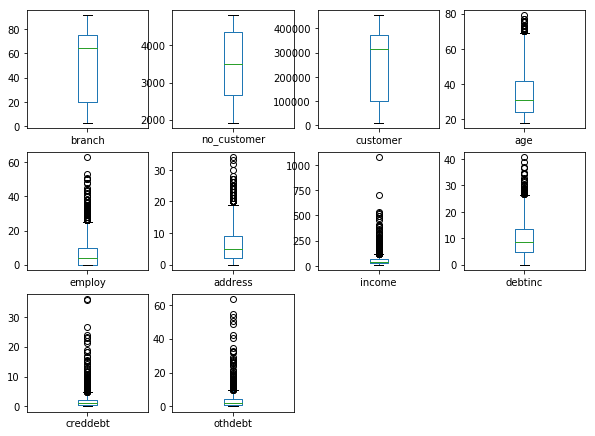

In [25]:
bank.plot(kind='box', layout = (4,4), subplots = True, sharex=False, figsize=(10,10))

In [30]:
bank_nooutliers.to_csv('bank3.csv', sep=',')